In [1]:
%load_ext autoreload
%autoreload 2
from utils import *
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
twitter_db = connect_to_db()

In [22]:
N = 3
G_dict = dict()

cursor = twitter_db.cursor()

query = ("SELECT user_id, in_reply_to_user_id, quoted_user_id, retweeted_user_id \
        FROM tweets WHERE lang='fr' LIMIT " + str(N))

cursor.execute(query)

for (user_id, in_reply_to_user_id, quoted_user_id, retweeted_user_id) in cursor:
    print(user_id, in_reply_to_user_id, quoted_user_id, retweeted_user_id)
    if user_id not in G_dict:
        G_dict[user_id] = {'replied_to': {}, 'quoted': {}, 'retweeted': {}}
        
    if not(in_reply_to_user_id is None):
        if in_reply_to_user_id not in G_dict:
            G_dict[in_reply_to_user_id] = {'replied_to': {}, 'quoted': {}, 'retweeted': {}}
        if in_reply_to_user_id not in G_dict[user_id]['replied_to']:
            G_dict[user_id]['replied_to'][in_reply_to_user_id] = 1
        else:
            G_dict[user_id]['replied_to'][in_reply_to_user_id] += 1
            
    if not(quoted_user_id is None):
        if quoted_user_id not in G_dict:
            G_dict[quoted_user_id] = {'replied_to': {}, 'quoted': {}, 'retweeted': {}}
        if quoted_user_id not in G_dict[user_id]['quoted']:
            G_dict[user_id]['quoted'][quoted_user_id] = 1
        else:
            G_dict[user_id]['quoted'][quoted_user_id] += 1
    
    if not(retweeted_user_id is None):
        if retweeted_user_id not in G_dict:
            G_dict[retweeted_user_id] = {'replied_to': {}, 'quoted': {}, 'retweeted': {}}
        if retweeted_user_id not in G_dict[user_id]['retweeted']:
            G_dict[user_id]['retweeted'][retweeted_user_id] = 1
        else:
            G_dict[user_id]['retweeted'][retweeted_user_id] += 1
    
cursor.close()       

1029413485 None None 983300684
413132646 None None 193476471
784769137956495360 101664219 None None


True

In [23]:
G_dict

{101664219: {'quoted': {}, 'replied_to': {}, 'retweeted': {}},
 193476471: {'quoted': {}, 'replied_to': {}, 'retweeted': {}},
 413132646: {'quoted': {}, 'replied_to': {}, 'retweeted': {193476471: 1}},
 983300684: {'quoted': {}, 'replied_to': {}, 'retweeted': {}},
 1029413485: {'quoted': {}, 'replied_to': {}, 'retweeted': {983300684: 1}},
 784769137956495360: {'quoted': {},
  'replied_to': {101664219: 1},
  'retweeted': {}}}

In [24]:
G = nx.DiGraph()
G.add_nodes_from(G_dict.keys())

for (u1,v) in G_dict.items():
    for (u2, count) in v['quoted'].items():
        print("quoted : {}--({})-->{}".format(u1, count, u2))
        G.add_edge(u1,u2,label='quoted',weight=count)
    for (u2, count) in v['replied_to'].items():
        print("replied to : {}--({})-->{}".format(u1, count, u2))
        G.add_edge(u1,u2,label='replied_to',weight=count)
    for (u2, count) in v['retweeted'].items():
        print("retweeted : {}--({})-->{}".format(u1, count, u2))
        G.add_edge(u1,u2,label='retweeted',weight=count)

replied to : 784769137956495360--(1)-->101664219
retweeted : 413132646--(1)-->193476471
retweeted : 1029413485--(1)-->983300684


In [25]:
G.edges()

OutEdgeView([(784769137956495360, 101664219), (413132646, 193476471), (1029413485, 983300684)])

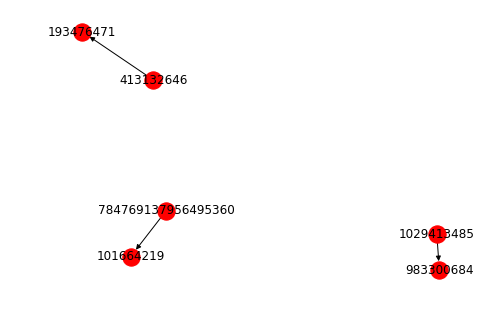

In [26]:
nx.draw(G,with_labels=True)

In [33]:
edge_labels

{(413132646, 193476471): 'retweeted',
 (1029413485, 983300684): 'retweeted',
 (784769137956495360, 101664219): 'replied_to'}

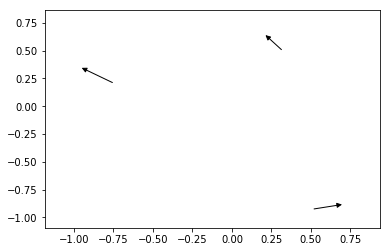

In [34]:
edge_labels = nx.get_edge_attributes(G,'label')
nx.draw_networkx_edges(G,pos=nx.spring_layout(G),edge_labels=edge_labels)

/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


{(1, 2): Text(1.5, 1.5, '0.5'), (1, 3): Text(1.0, 0.5, '9.8')}

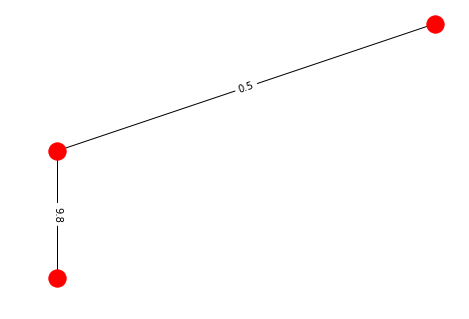

In [35]:
G=nx.Graph()
i=1
G.add_node(i,pos=(i,i))
G.add_node(2,pos=(2,2))
G.add_node(3,pos=(1,0))
G.add_edge(1,2,weight=0.5)
G.add_edge(1,3,weight=9.8)
pos=nx.get_node_attributes(G,'pos')
nx.draw(G,pos)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)